In [55]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
#from sklearn.model_Selection import train_test_split

In [56]:
data=pd.read_csv('kc_house_data.csv/kc_house_data.csv')

In [57]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [58]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [59]:
data=data.drop(['id','date'],axis=1)

In [60]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [61]:
import seaborn as sns

C:\Users\Sahil Naik\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Sahil Naik\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


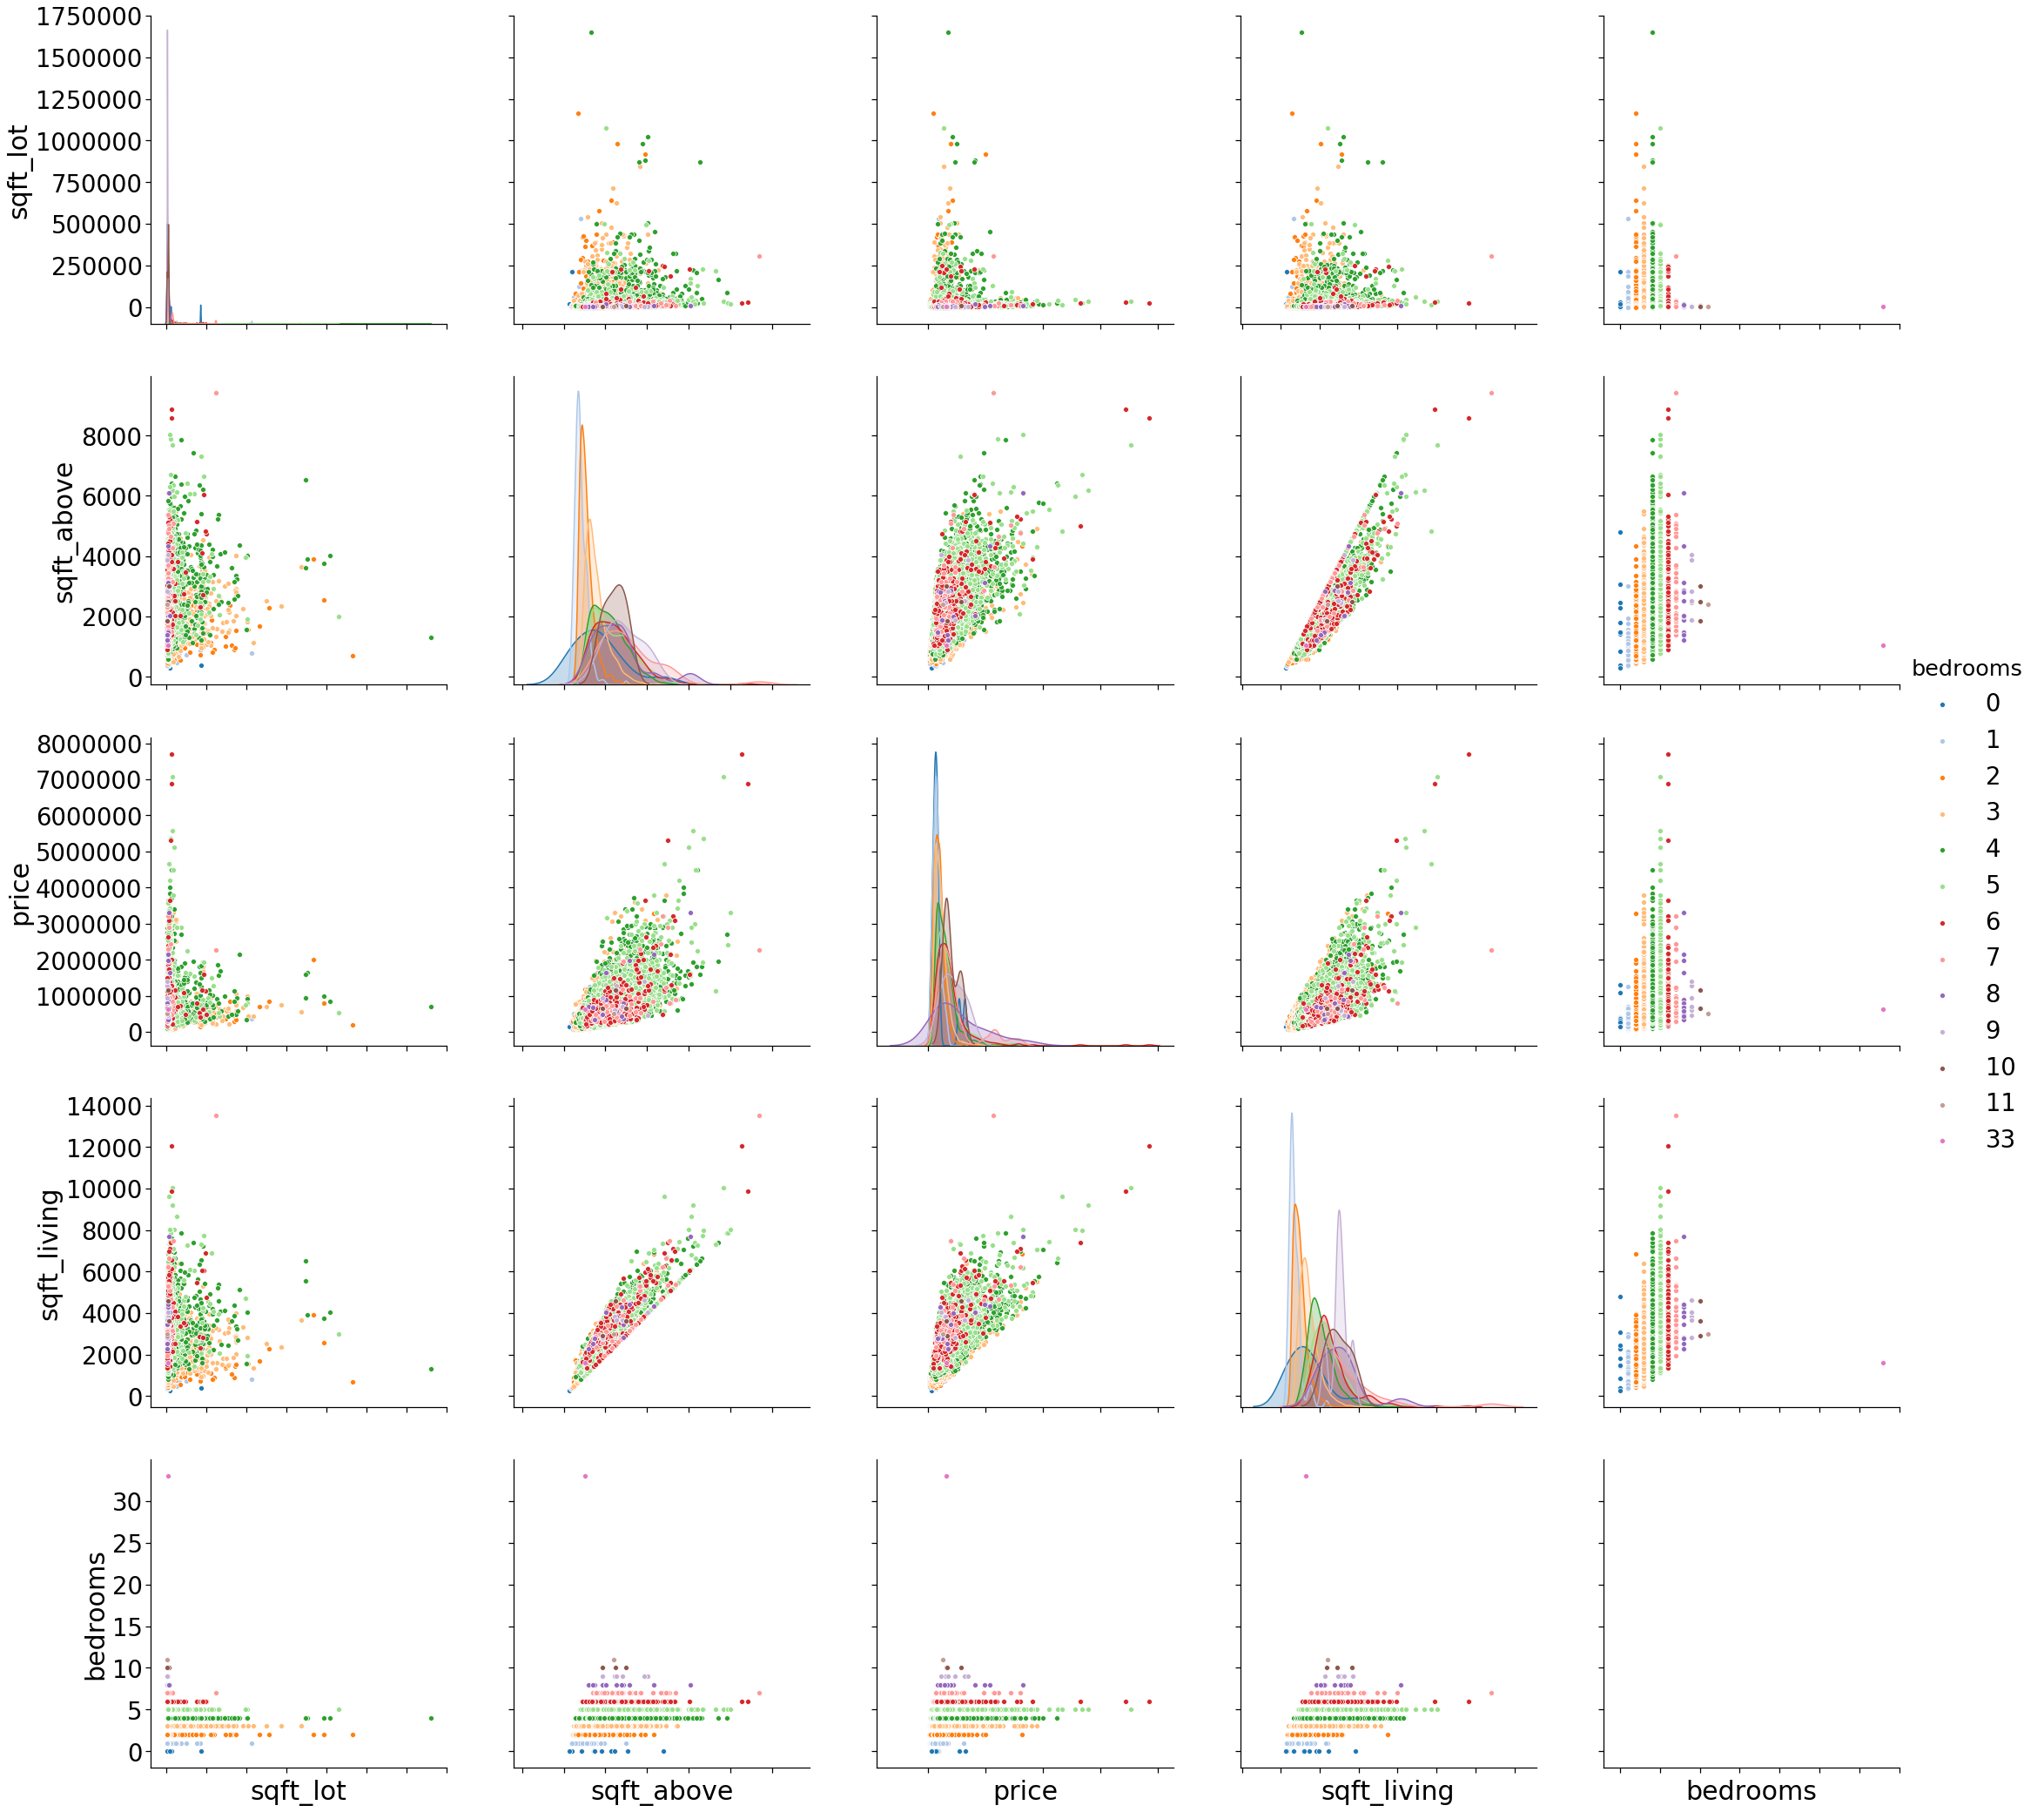

In [63]:
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(data[['sqft_lot','sqft_above','price','sqft_living','bedrooms']], 
                 hue='bedrooms', palette='tab20',size=6)
g.set(xticklabels=[]);


In [64]:
x=data.iloc[:,1:].values
y=data.iloc[:,0].values

In [65]:
x.shape

(21613, 18)

In [66]:
y.shape

(21613,)

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 1/3,random_state=0)

In [69]:
lr=LinearRegression()

In [70]:
x_train.shape

(14408, 18)

In [71]:
y_train.shape

(14408,)

In [72]:
x_test.shape

(7205, 18)

In [73]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
lr.intercept_

314597.6722036741

In [81]:
lr.coef_

array([-2.89896991e+04,  3.62138153e+04,  1.00220413e+02,  2.60670123e-01,
        1.20727307e+04,  6.23705375e+05,  5.23954366e+04,  2.83989522e+04,
        9.61484867e+04,  6.32485476e+01,  3.69718649e+01, -2.53247077e+03,
        1.30419682e+01, -5.13069194e+02,  6.08417694e+05, -2.07473774e+05,
        3.36243161e+01, -4.85344013e-01])

In [82]:
p=lr.predict(x_test)

In [83]:
p

array([ 386540.9984785 , 1516969.01534035,  538662.72575267, ...,
        526000.75505736,  313924.63663338,  400525.6731457 ])

In [84]:
from sklearn import metrics


In [85]:
metrics.mean_absolute_error(y_test,p)

123805.4360473204

In [93]:
m=metrics.mean_squared_error(y_test,p)
m

251629452308.1138

In [94]:
np.sqrt(m)

501626.8058109672